# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import plotnine as plot9           # https://anaconda.org/conda-forge/plotnine
import random                      # https://www.w3schools.com/python/ref_random_seed.asp
import requests
import io

In [2]:
# import algorithm functions
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator     # conda install -c conda-forge kneed
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from plotnine import *
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler

In [3]:
# eliminate warnings
# https://www.geeksforgeeks.org/how-to-disable-python-warnings/#
import warnings
warnings.filterwarnings('ignore') 

In [4]:
current_path  = os.getcwd()
current_path

'/Users/kaylaburge/OneDrive - University of Florida/CURRENT CLASSES/Marketing Analytics 1/Code'

The source data is available on GitHub at this location: [Mall Customers Dataset](https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Datasets/Mall_Customers.csv). 

In [5]:
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
download = requests.get(url).content
mydata = pd.read_csv(io.StringIO(download.decode('utf-8')))
mydata

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
mydata.columns = ['CustID','Gender','Age','Inc','SpendScr']

In [7]:
mydata

,CustID,Gender,Age,Inc,SpendScr
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Elbow Plot method

In [8]:
# setting up for tests for K = 1 to 10
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

In [9]:
# selects the 3 numeric variables in the dataframe and assigns those variables to a new dataframe 'X'
X = mydata[["Age", "Inc", "SpendScr"]]

This block of code calculates the sum of squared distances based on different values of K. 

In [11]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

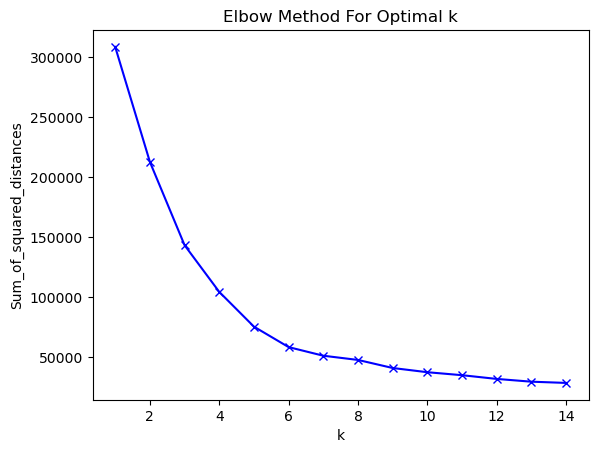

In [12]:
#visualization of sum of squared distances
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
# this code permits us to map the inertia for each of the different levels of K. We can then store the inertia value in a new object.
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [14]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 35.5832677310801
2 : 30.11722673262042
3 : 24.013910603806483
4 : 20.468250917276343
5 : 17.766649611632193
6 : 15.438839453968932
7 : 14.59016365904806
8 : 13.838474510495054
9 : 13.314039239003641
10 : 12.538198336728467
11 : 12.103283422323809
12 : 11.457381560575614
13 : 11.349448694680994
14 : 10.903273520684195


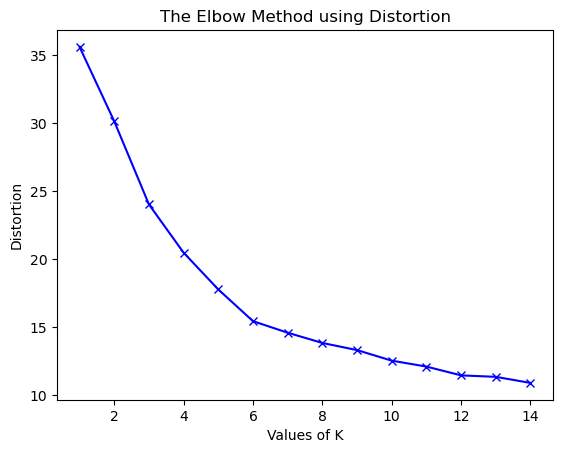

In [15]:
# plot the distortion metric by the K value. Distortion will provide another metric against which to evaluate the number of clusters (K).
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [16]:
# looking at the values in interia
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 308812.77999999997
2 : 212840.1698209719
3 : 143342.751571706
4 : 104366.15145556198
5 : 75493.84464013917
6 : 58300.44332159069
7 : 51118.83903912705
8 : 44342.3173934174
9 : 40798.68774656602
10 : 37699.70885302062
11 : 34399.16518985859
12 : 31915.009332116686
13 : 29978.31837974117
14 : 28040.66392940393


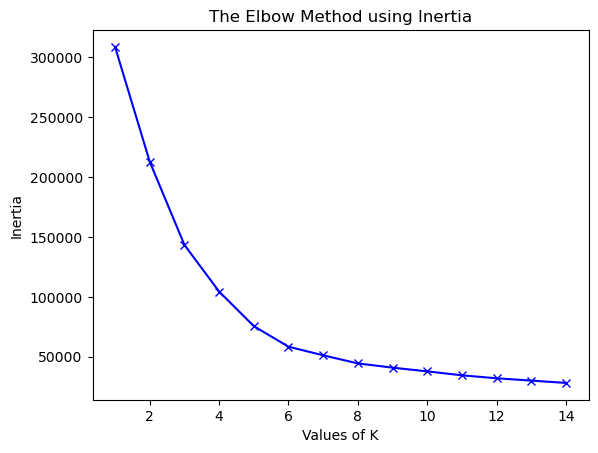

In [17]:
# plotting the inertia metric for evaluating K
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

6 clusters might be a good number to use

In [18]:
k = 6

In [19]:
kmeans = KMeans(n_clusters=k)

In [20]:
random.seed(365)

In [21]:
kmeans = kmeans.fit(mydata[["Age", "Inc", "SpendScr"]])

In [22]:
labels = kmeans.predict(mydata[["Age", "Inc", "SpendScr"]])

In [23]:
#preserving the clusters and centers so they dont move
centroids = kmeans.cluster_centers_

In [24]:
print(labels)
print(centroids)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 0 4 0 3 5 4 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[56.15555556 53.37777778 49.08888889]
 [32.69230769 86.53846154 82.12820513]
 [41.68571429 88.22857143 17.28571429]
 [27.         56.65789474 49.13157895]
 [25.27272727 25.72727273 79.36363636]
 [44.14285714 25.14285714 19.52380952]]


In [25]:
clu_calc = mydata

This step will append the cluster assigned by the algorithm as a new column in the dataframe (called 'label').

In [26]:
clu_calc['label'] = labels

In [27]:
#added the label that got created by the k means clustering and added the label colum to the mydta df
clu_calc

,CustID,Gender,Age,Inc,SpendScr,label
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


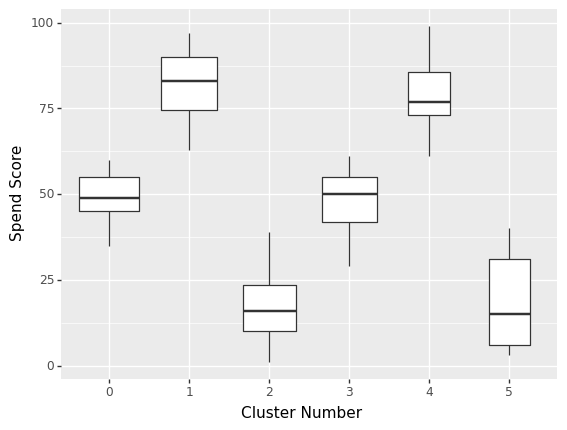

<ggplot: (332341709)>

In [28]:
#boxplots to descibe the clusters
#variable width = true means that if there are more observations the bar is wider
(
    ggplot(clu_calc)
    + geom_boxplot(aes(x='factor(label)', y='SpendScr'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Spend Score")

)

#clusters with highest spend score are interesting to me
#clusters 1 and 2

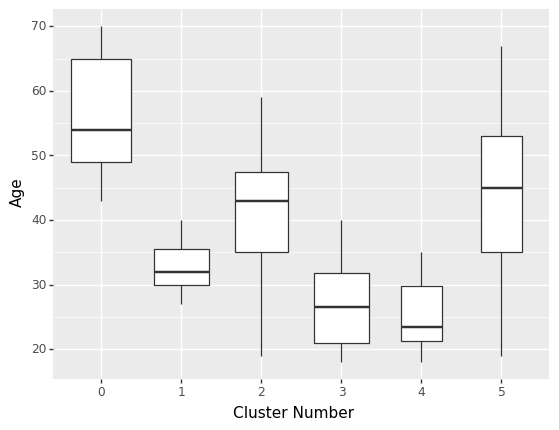

<ggplot: (331136145)>

In [29]:
(
    ggplot(clu_calc)
    + geom_boxplot(aes(x='factor(label)', y='Age'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Age")

)

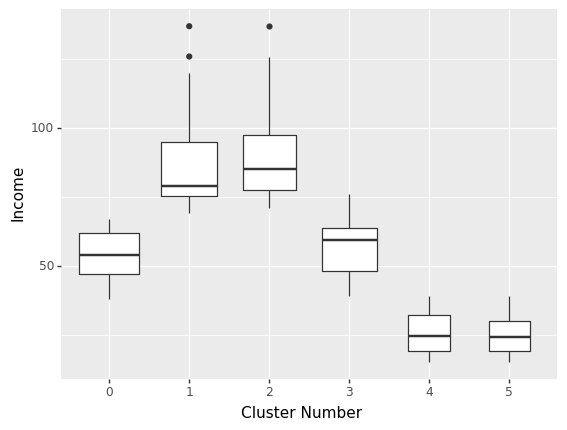

<ggplot: (333283657)>

In [30]:
(
    ggplot(clu_calc)
    + geom_boxplot(aes(x='factor(label)', y='Inc'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Income")

)

These 3 numeric variables are on different scales. 

The code will recalculate the 3 numeric variables to illustrate how that changes the outcomes. 

In [31]:
#it took each value on the data frame and put it in this scale
mms = MinMaxScaler()
mms.fit(mydata[["Age", "Inc", "SpendScr"]])
data_transformed = mms.transform(mydata[["Age", "Inc","SpendScr"]])
data_transformed

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

In [32]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

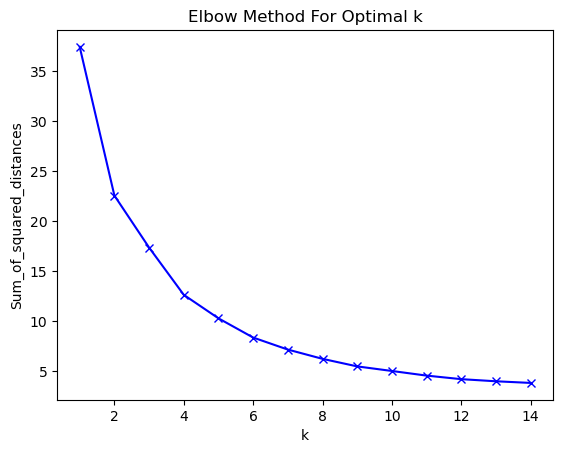

In [33]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Printing the elbow plot using the scaled variable clusters
# looks like it flattens out at the 4

4 clusters might be good to use

In [34]:
k = 4

In [35]:
kmeans = KMeans(n_clusters=k)

In [36]:
random.seed(365)

In [37]:
kmeans = kmeans.fit(data_transformed)

In [38]:
labels = kmeans.predict(data_transformed)

In [39]:
centroids = kmeans.cluster_centers_

In [40]:
print(labels)
print(centroids)

[2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 3 2 2 2 0 0 0 0 2 3 1 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[0.69201183 0.26809584 0.39764521]
 [0.28605769 0.58278689 0.82168367]
 [0.14304993 0.20491803 0.60508414]
 [0.41093117 0.58606557 0.1895811 ]]


In [41]:
clu_calc = mydata

In [42]:
clu_calc['label'] = labels

In [43]:
clu_calc

,CustID,Gender,Age,Inc,SpendScr,label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


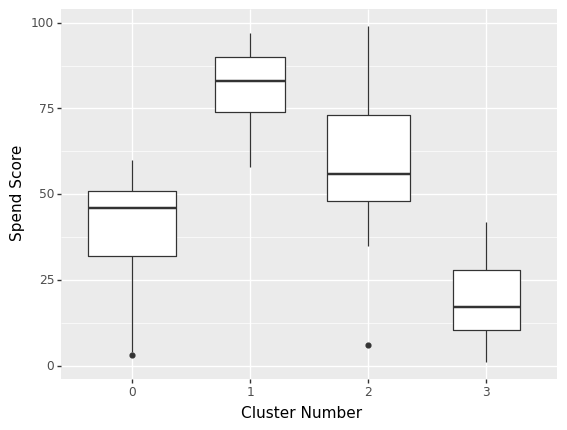

<ggplot: (333437717)>

In [44]:
(
    ggplot(clu_calc)
    + geom_boxplot(aes(x='factor(label)', y='SpendScr'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Spend Score")

)

# cluster 2 is most attractive by spend score

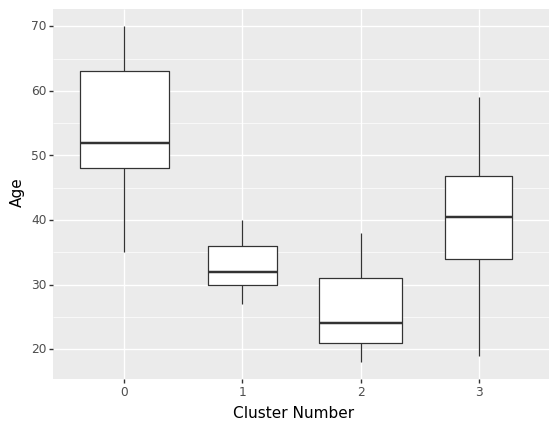

<ggplot: (333330989)>

In [45]:
(
    ggplot(clu_calc)
    + geom_boxplot(aes(x='factor(label)', y='Age'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Age")

)

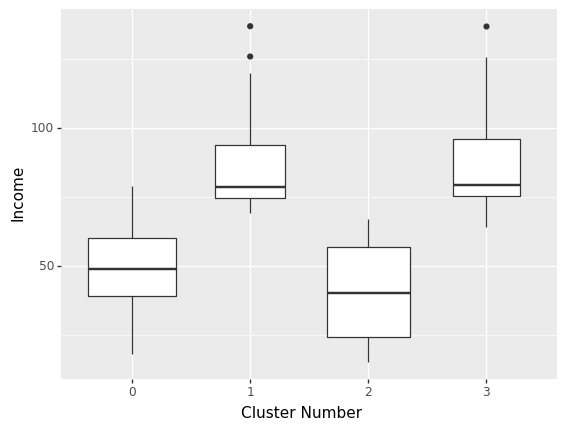

<ggplot: (333495817)>

In [46]:
(
    ggplot(clu_calc)
    + geom_boxplot(aes(x='factor(label)', y='Inc'),
                  varwidth = True,
                  show_legend = True)
    + labs(x="Cluster Number", y="Income")

)

In [47]:
clu_calc.to_csv('clu_calc.csv', index = False)

In [48]:
mydata = pd.DataFrame(clu_calc)
mydata

,CustID,Gender,Age,Inc,SpendScr,label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [49]:
# create a filter using the label column
label = mydata['label']

In [50]:
# illustrate the filter using the label variable
label_0 = mydata[label==0]
label_0.head()

,CustID,Gender,Age,Inc,SpendScr,label
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0


In [51]:
# create the other clusters based on the filter match
label_1 = mydata[label==1]
label_2 = mydata[label==2]
label_3 = mydata[label==3]

In [52]:
# create a vector of the column nmaes
cols = label_0.columns
cols

Index(['CustID', 'Gender', 'Age', 'Inc', 'SpendScr', 'label'], dtype='object')

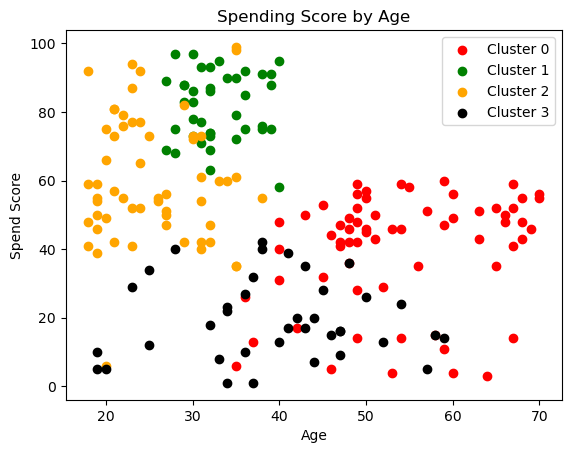

In [53]:
# scatterplot of Age by Spend Score
plt.scatter(label_0[cols[2]], label_0[cols[4]], color = 'red', label="Cluster 0")
plt.scatter(label_1[cols[2]], label_1[cols[4]], color = 'green', label = "Cluster 1")
plt.scatter(label_2[cols[2]], label_2[cols[4]], color = 'orange', label = "Cluster 2")
plt.scatter(label_3[cols[2]], label_3[cols[4]], color = 'black', label = "Cluster 3")
plt.xlabel("Age")
plt.ylabel("Spend Score")
plt.title("Spending Score by Age")
plt.legend()
plt.show()

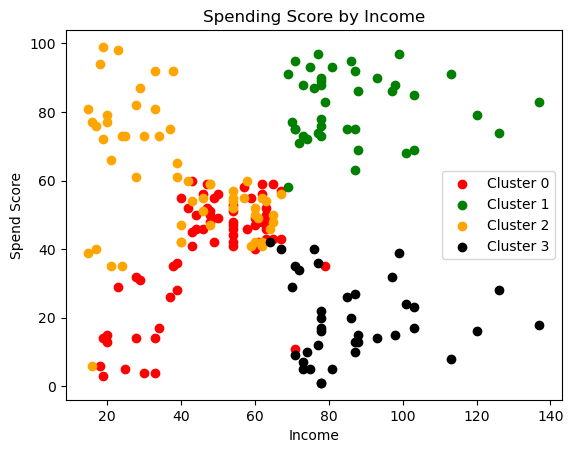

In [54]:
# scatterplot of Income by Spend Score
plt.scatter(label_0[cols[3]], label_0[cols[4]], color = 'red', label="Cluster 0")
plt.scatter(label_1[cols[3]], label_1[cols[4]], color = 'green', label = "Cluster 1")
plt.scatter(label_2[cols[3]], label_2[cols[4]], color = 'orange', label = "Cluster 2")
plt.scatter(label_3[cols[3]], label_3[cols[4]], color = 'black', label = "Cluster 3")
plt.xlabel("Income")
plt.ylabel("Spend Score")
plt.title("Spending Score by Income")
plt.legend()
plt.show()

In [55]:
mydata.head()

,CustID,Gender,Age,Inc,SpendScr,label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [56]:
# means by cluster
age_mean = mydata.groupby(['label'])['Age'].mean()
inc_mean = mydata.groupby(['label'])['Inc'].mean()
spend_mean = mydata.groupby(['label'])['SpendScr'].mean()
age_mean = pd.DataFrame(age_mean)
inc_mean = pd.DataFrame(inc_mean)
spend_mean = pd.DataFrame(spend_mean)

In [57]:
merged_df = pd.merge(age_mean,inc_mean, left_index=True, right_index=True)
merged_df = pd.merge(merged_df,spend_mean, left_index=True, right_index=True)
merged_df

,Age,Inc,SpendScr
label,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [58]:
# turn the index into a column in the data frame
# https://datatofish.com/index-to-column-pandas-dataframe/
merged_df.reset_index(inplace=True)
merged_df = merged_df.rename(columns = {'label':'Cluster'})
merged_df.head()

,Cluster,Age,Inc,SpendScr
0,0,53.984615,47.707692,39.969231
1,1,32.875000,86.100000,81.525000
2,2,25.438596,40.000000,60.298246
3,3,39.368421,86.500000,19.578947


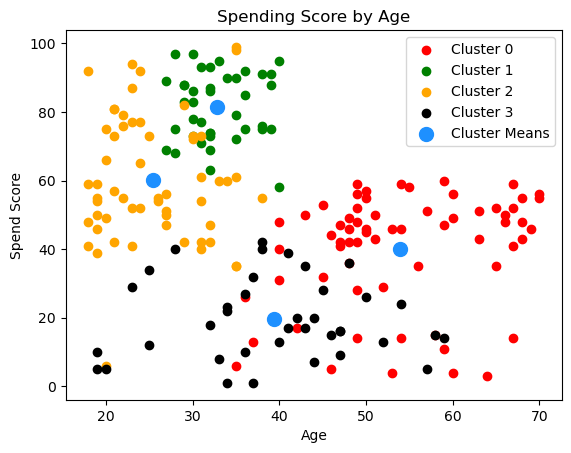

In [59]:
# scatterplot of Age by Spend Score
plt.scatter(label_0[cols[2]], label_0[cols[4]], color = 'red', label="Cluster 0")
plt.scatter(label_1[cols[2]], label_1[cols[4]], color = 'green', label = "Cluster 1")
plt.scatter(label_2[cols[2]], label_2[cols[4]], color = 'orange', label = "Cluster 2")
plt.scatter(label_3[cols[2]], label_3[cols[4]], color = 'black', label = "Cluster 3")
plt.scatter(merged_df[['Age']], merged_df[['SpendScr']], color='dodgerblue', label="Cluster Means", s=100)
plt.xlabel("Age")
plt.ylabel("Spend Score")
plt.title("Spending Score by Age")
plt.legend()
plt.show()

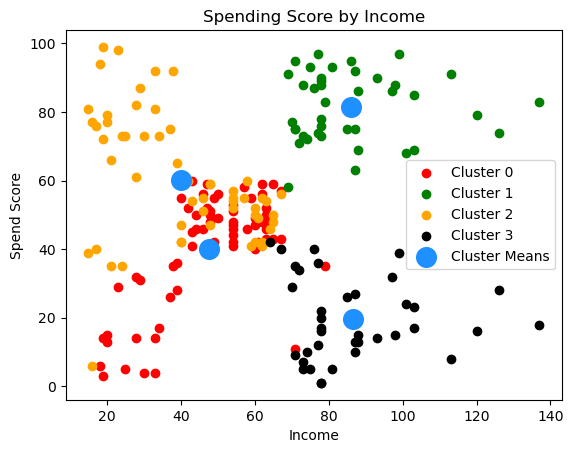

In [60]:
# scatterplot of Income by Spend Score
plt.scatter(label_0[cols[3]], label_0[cols[4]], color = 'red', label="Cluster 0")
plt.scatter(label_1[cols[3]], label_1[cols[4]], color = 'green', label = "Cluster 1")
plt.scatter(label_2[cols[3]], label_2[cols[4]], color = 'orange', label = "Cluster 2")
plt.scatter(label_3[cols[3]], label_3[cols[4]], color = 'black', label = "Cluster 3")
plt.scatter(merged_df[['Inc']], merged_df[['SpendScr']], color='dodgerblue', label="Cluster Means", s=200)
plt.xlabel("Income")
plt.ylabel("Spend Score")
plt.title("Spending Score by Income")
plt.legend()
plt.show()